<a href="https://colab.research.google.com/github/CoProjOfUnemployeds/TIL-of-Unemployeds/blob/main/210817_JH_Deep_learning(Propagation%2C_Overfitting%2C_Gradient_pb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.순전파(Forward Propagation)

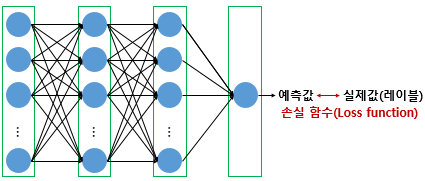

2.손실함수(Loss Function)


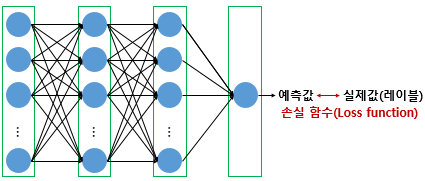

In [ ]:
# 손실 함수의 종류
# 1.MSE(Mean Squared Error) - 연속형 변수일때 사용
# 2.Cross-Entropy - 낮은 확률 예측해서 맞추기 or 높은 확률 예측해서 틀리는경우 loss가 더큼
# 이진분류일때는 binary_crossentropy 사용, 다중 클래스 분류일때 에는 categorical_crossentropy 사용
model.compile(loss='categorical_cross', optimizer = 'adam', metrics=['acc'])


3.옵티마이저(Optimizer)

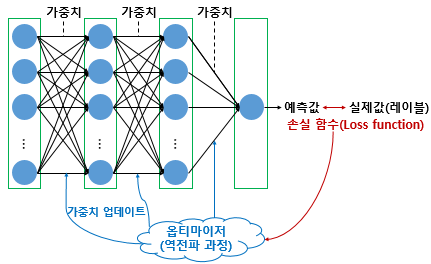

In [ ]:
# 1.배치경사 하강법(Batch Gradient Descent) - 전체의 데이터 고려 / 시간 오래걸리지만 정확함
model.fit(X_train, y_train, batch_size = len(train_X))
# 2.확률경사 하강법(Stochastic Gradient Descent, SGD) - 하나의 랜덤데이터 고려 / 빠른시간에 구할 수 있지만 정확하지않을 수 있음 
model.fit(X_train, y_train, batch_size = 1)
# 3.미니배치경사 하강법(Mini Batch Gradinet Descent) - 어느정도의 데이터를 고려 / 배치보다 빠르고 SGD보다 안정적임
model.fit(X_train, y_train, batch_size = 32)
# 4.모멘텀(Momentum) - 관성을 통해 local minimum을 벗어나 global maximum을 찾기위한 방도
keras.optimizers.SGD(lr = 0.01, momentum = 0.9)
# 5.아다그라드(Adagrad) - 모든 데이터에 같은 학습률을 적용하는건 무리 / 빠르게 변하는 매개변수 일수록 학습률을 적게설정
keras.optimizers.Adagrad(lr = 0.01, epsilon = 1e-6)
# 6.알엠에스 프롭(RMSprop) - 아다그라드의 나중 학습률이 현저히 떨어지는 단점을 보완한 개선판
keras.optimizers.RMSprop(lr = 0.001, rho=0.9, epsilon = 1e-6)
# 7.아담(Adam) - RMSprop + Momentum을 합친것
keras.optimizers.Adam(lr = 0.001, beta_1 = 0.9, beta_2 = , epsilon = , decay = , amsgrad = False)

4.  역전파(BackPropagation)

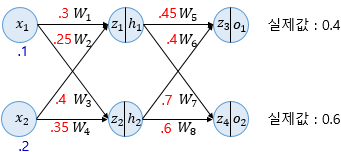

1단계 순전파 식

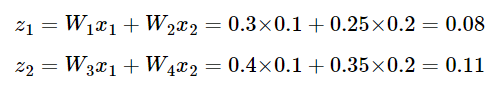

은닉층에서의 시그모이드 함수 적용

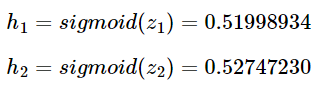

마지막에 오차값(error)계산하기위한 mse 적용

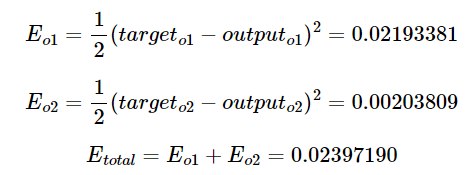

-------------------------------------------------------
역전파

미분의 연쇄법칙

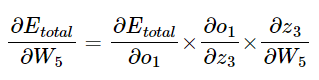

첫번째 항

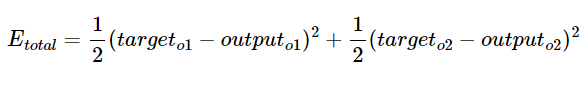


두번째 항(참고로 시그모이드 함수를 미분하면 f(x)(1-f(x))꼴으로 됨

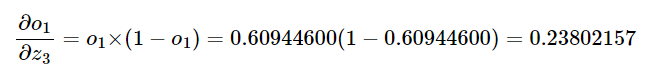

세번째 항은 h1값과 동일


이후 경사하강법 업데이트로 가중치 보정

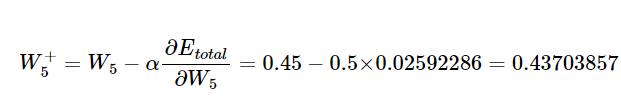


5. 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)

In [ ]:
# 1. 에포크 -> 순전파와 역전파가 끝난 상황, 너무 많거나 너무 적으면 overfitting이 일어날 수 있음
# 2. 배치 크기 -> 데이터 단위의 매개변수(전체 데이터 / 배치의 수  =  배치크기)
# 3. 이터레이션 -> 배치의 수

<과적합(Overfitting) 을 막는 방법>

1, 데이터 양을 늘린다. 
-> 너무 적으면 노이즈나 특정패턴을 인식하게되는 문제 발생하게됨
-> 이미지 같은경우 의도적으로 사진을 돌리거나, 노이즈룰 추가하여 데이터를 의도적으로 증강시킨다.

2. 모델의 복잡도를 줄인다.
-> 복잡도는 매개변수의 수와 은닉층 수로 결정된다. 과적합이 포착되었을때 인공 신경망의 복잡도를 줄이는 것이 한가지 조치방법이다.

3. 가중치 규제 적용하기
-> 복잡한 모델일수록 과적합 될 가능성이 크다. 따라서 가중치 규제를 적용한다.
1. L1 규제 : 가중치 w들의 절대값 합계를 비용 함수에 추가합니다.
-> 모든 가중치에 λ|w| 더한값을 비용함수로 한다.
-> w의 값은 0또는 0에 가까워진다. / 0에 가까워진 모델은 사용하지 않는다.
2. L2 규제 : 모든 가중치 w들의 제곱합을 비용 함수에 추가합니다.
-> 모든 가중치에 1/2 λw^2 더한값을 비용함수로 한다.
-> 완전히 0이 되기보다는 0에 가까워진다.


L1 규제는 어떤 특성들이 모델에 영향을 주는지 확인할 수 있다. 경험적으로 L1보다는 L2규제가 잘 작동함


4. 드롭아웃(Drop Out)
인공 신경망에서 드롭아웃 절반으로 설정하게 된다면 학습 과정마다, 
랜덤으로 절반의 뉴런을 사용하게 된다. 
-> 신경망 학습에 사용되고, 예측할때는 사용되지 않는것이 일반적이다.

In [ ]:
# keras에서 드롭아웃 사용과정

model = Sequential()
model.add(Dense(256, input_shape = (max_words,) , activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = 'softmax'))

기울기 소실(Gradient Vanishing)과 폭주(Exploding)

1. ReLU와 ReLU의 변형(Leaky ReLU등..)들

2. 기울기 자르기(Gradient Clipping) - 임계치만큼 크기를 감소(RNN에서 유용함)

In [ ]:
from tensorflow.keras import optimizers
Adam = optimizers.Adam(lr = 0.001, clipnorm= 1.)

3. 가중치 초기화(Xavier, He 초기화)

1) Xavier - ReLU함수와 사용하기에는 부적합

균등분포로 초기화 할때에는

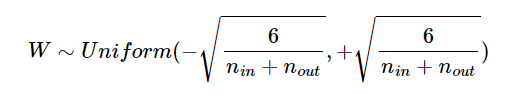


정규분포로 초기화 할때 표준편차는 다음을 만족

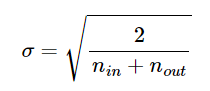


2) He - ReLU와 사용하기 보편적임

균등분포로 초기화 할때에는

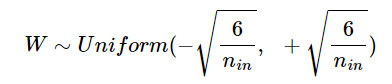

마찬가지로 정규화할때 표준편차는 다음을 만족

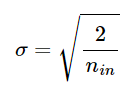


-> 시그모이드 of 하이퍼볼릭 탄젠트 함수를 사용할 때는 Xavier초기화가 적합함

-> ReLU or 변형된 ReLU에서는 He 초기화가 적합함

4. 배치 정규화(ReLU와 He정규화를 통해 기울기 소실과 폭주를 완화시킬 수 있지만, 훈련중 언제든 다시 발생할 수 있음,배치 정규화를 통해 예방하는 방법이 있다.)

1) 내부 공변량 변화(Internal Covariate Shift) : 기울기의 소실/폭주 등의 불완전성으로 층마다 입력의 분포가 달라지게 됨

-> 공변량 변화는 훈련 데이터와 테스트 데이터 간 분포가 다른 경우를 의미함

-> 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미한다.

: 배치 정규화로 학습을 돕는다.

2) 배치 정규화(Batch Normalization): 입력에 대해 평균을 0으로 만들고, 정규화를 한다, 스케일 시프트를 수행한다. 

1. γ = 스케일 조정을 위해 사용
2. β = 시프트 하는 것에 사용하여 다음 레이어에 일정한 범위의 값만 전달 

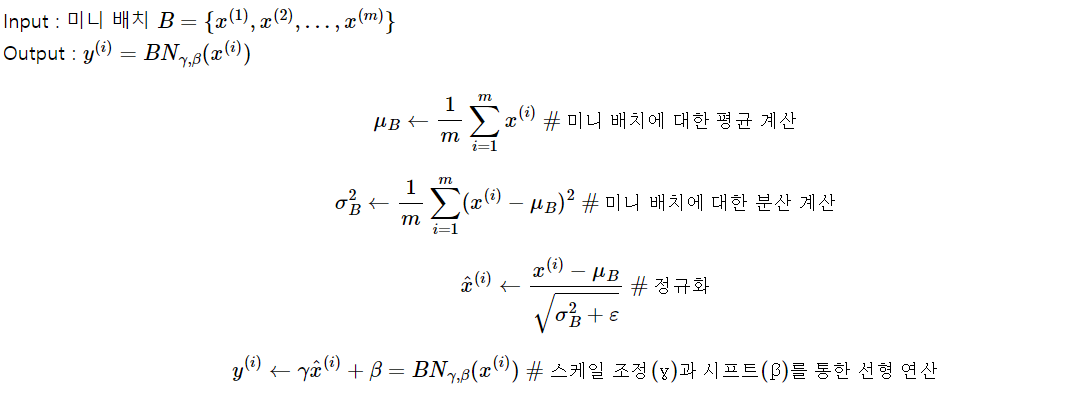
ε = 분모가 0이되는것을 막기위해 더하는 작은 양수(보편적으로 10^-5)


한계: 
1. 미니 배치 크기에 한정적임
-> 어느정도 규모가 있는 배치 크기에서 적용해야 함, 너무 작은 미니배치 사이즈에서는 단적으로 작용해서 훈련에 악영향을 끼칠 가능성이 크다.

2. RNN에 적용하기 힘들다
-> RNN에서는 time step마다 서로다른 통계치를 가지고 있기때문에, 배치 정규화를 적용하는것이 어렵게 만든다. 대신, 배치 사이즈에 의존적이지 않고, RNN에 적용하기 알맞은 방법은 층 정규화(layer normalization) 이다. 


5.층 정규화

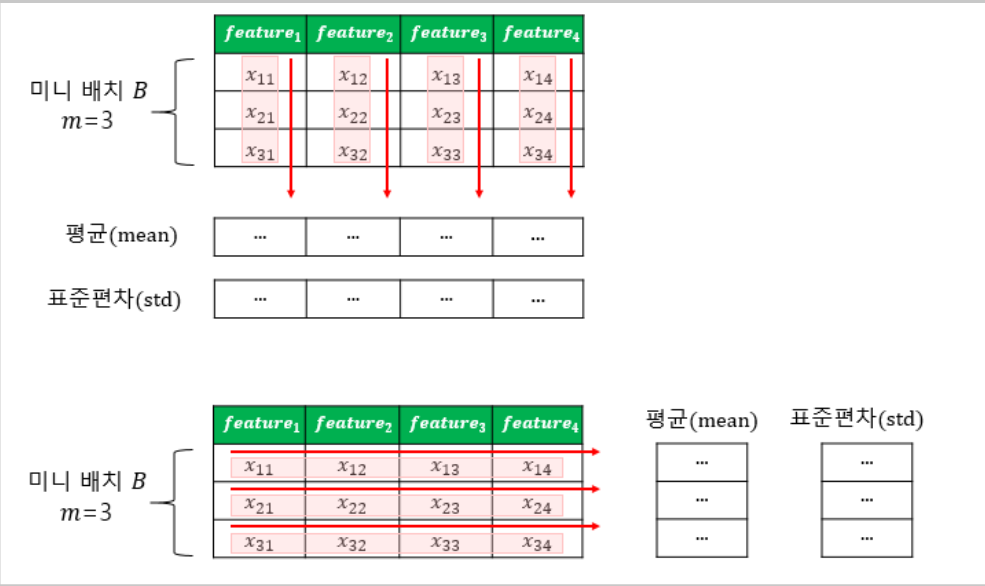